In [ ]:
# =======================================
# 1. Data Loading
# =======================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/DS160/Final Project/AI_Impact_on_Jobs_2030.csv")

df.head()


,Job_Title,Average_Salary,Years_Experience,Education_Level,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Risk_Category,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,Skill_6,Skill_7,Skill_8,Skill_9,Skill_10
0,Security Guard,45795,28,Master's,0.18,1.28,0.85,High,0.45,0.10,0.46,0.33,0.14,0.65,0.06,0.72,0.94,0.00
1,Research Scientist,133355,20,PhD,0.62,1.11,0.05,Low,0.02,0.52,0.40,0.05,0.97,0.23,0.09,0.62,0.38,0.98
2,Construction Worker,146216,2,High School,0.86,1.18,0.81,High,0.01,0.94,0.56,0.39,0.02,0.23,0.24,0.68,0.61,0.83
3,Software Engineer,136530,13,PhD,0.39,0.68,0.60,Medium,0.43,0.21,0.57,0.03,0.84,0.45,0.40,0.93,0.73,0.33
4,Financial Analyst,70397,22,High School,0.52,1.46,0.64,Medium,0.75,0.54,0.59,0.97,0.61,0.28,0.30,0.17,0.02,0.42


In [ ]:
# Check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Job_Title                    3000 non-null   object 
 1   Average_Salary               3000 non-null   int64  
 2   Years_Experience             3000 non-null   int64  
 3   Education_Level              3000 non-null   object 
 4   AI_Exposure_Index            3000 non-null   float64
 5   Tech_Growth_Factor           3000 non-null   float64
 6   Automation_Probability_2030  3000 non-null   float64
 7   Risk_Category                3000 non-null   object 
 8   Skill_1                      3000 non-null   float64
 9   Skill_2                      3000 non-null   float64
 10  Skill_3                      3000 non-null   float64
 11  Skill_4                      3000 non-null   float64
 12  Skill_5                      3000 non-null   float64
 13  Skill_6           

In [ ]:
# Check shape
df.shape

(3000, 18)

In [ ]:
df.isnull().sum()

,0
Job_Title,0
Average_Salary,0
Years_Experience,0
Education_Level,0
AI_Exposure_Index,0
Tech_Growth_Factor,0
Automation_Probability_2030,0
Risk_Category,0
Skill_1,0
Skill_2,0


In [ ]:
df.describe(include="all")

,Job_Title,Average_Salary,Years_Experience,Education_Level,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Risk_Category,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,Skill_6,Skill_7,Skill_8,Skill_9,Skill_10
count,3000,3000.000000,3000.000000,3000,3000.000000,3000.000000,3000.000000,3000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
unique,20,NaN,NaN,4,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Software Engineer,NaN,NaN,High School,NaN,NaN,NaN,Medium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,175,NaN,NaN,784,NaN,NaN,NaN,1521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,89372.279000,14.677667,NaN,0.501283,0.995343,0.501503,NaN,0.496973,0.497233,0.499313,0.503667,0.490270,0.499807,0.499160,0.502843,0.501433,0.493627
std,NaN,34608.088767,8.739788,NaN,0.284004,0.287669,0.247881,NaN,0.287888,0.288085,0.288354,0.287063,0.285818,0.286050,0.288044,0.289832,0.285818,0.286464
min,NaN,30030.000000,0.000000,NaN,0.000000,0.500000,0.050000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,58640.000000,7.000000,NaN,0.260000,0.740000,0.310000,NaN,0.240000,0.250000,0.250000,0.260000,0.240000,0.260000,0.250000,0.250000,0.260000,0.250000
50%,NaN,89318.000000,15.000000,NaN,0.500000,1.000000,0.500000,NaN,0.505000,0.500000,0.500000,0.510000,0.490000,0.500000,0.490000,0.500000,0.500000,0.490000
75%,NaN,119086.500000,22.000000,NaN,0.740000,1.240000,0.700000,NaN,0.740000,0.740000,0.750000,0.750000,0.730000,0.740000,0.750000,0.750000,0.740000,0.740000


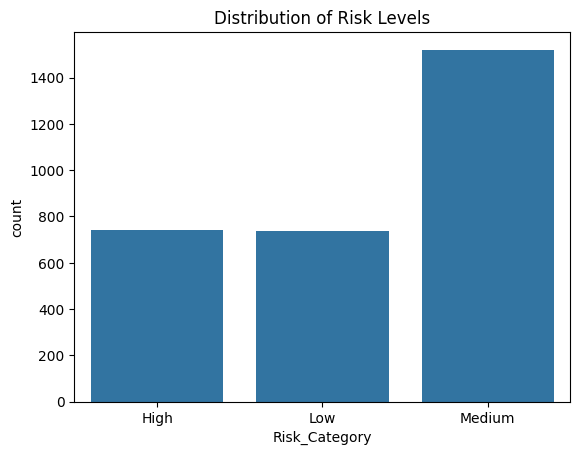

In [ ]:
sns.countplot(data=df, x="Risk_Category")
plt.title("Distribution of Risk Levels")
plt.show()

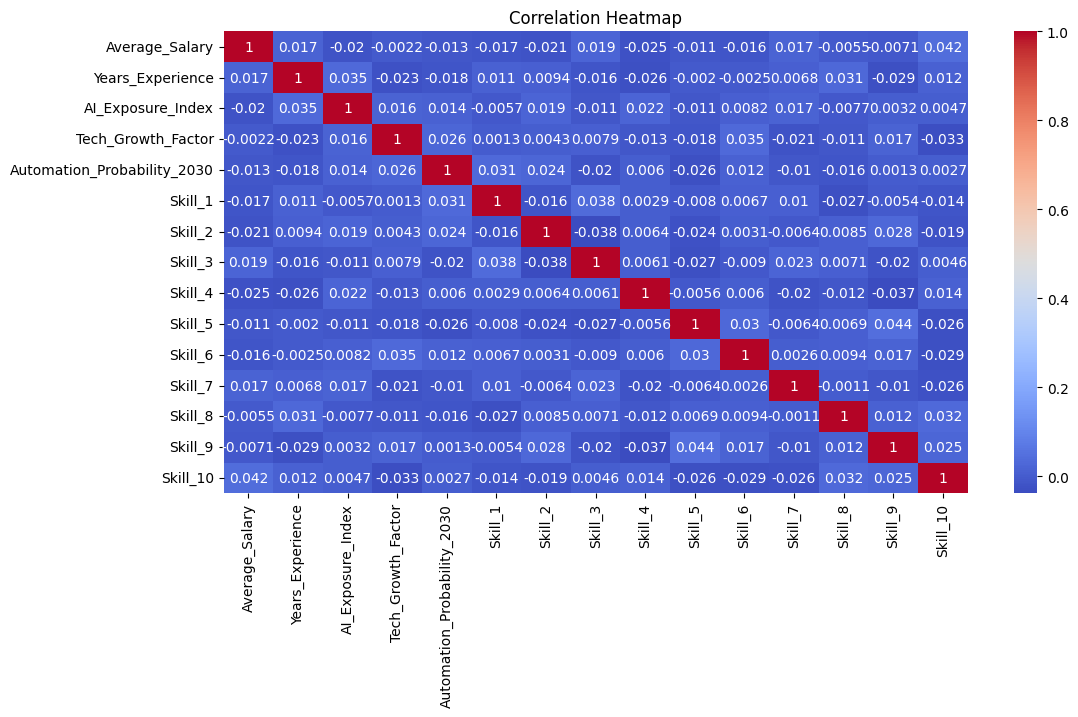

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

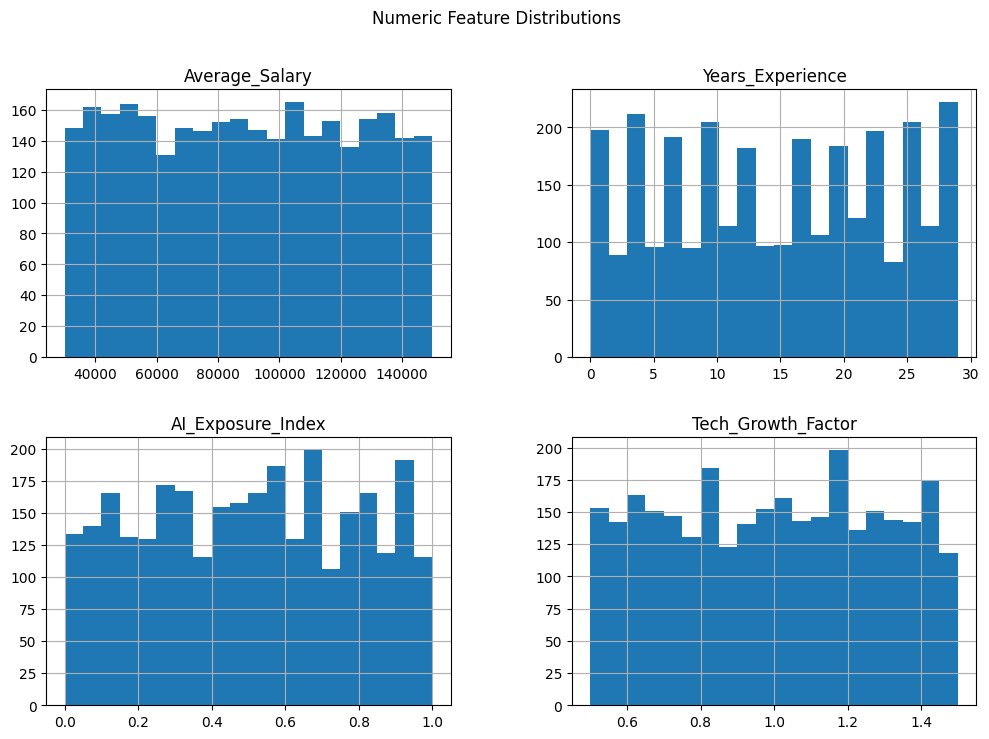

In [ ]:
numeric_cols = df.select_dtypes(include=np.number).columns[:4]

df[numeric_cols].hist(figsize=(12,8), bins=20)
plt.suptitle("Numeric Feature Distributions")
plt.show()

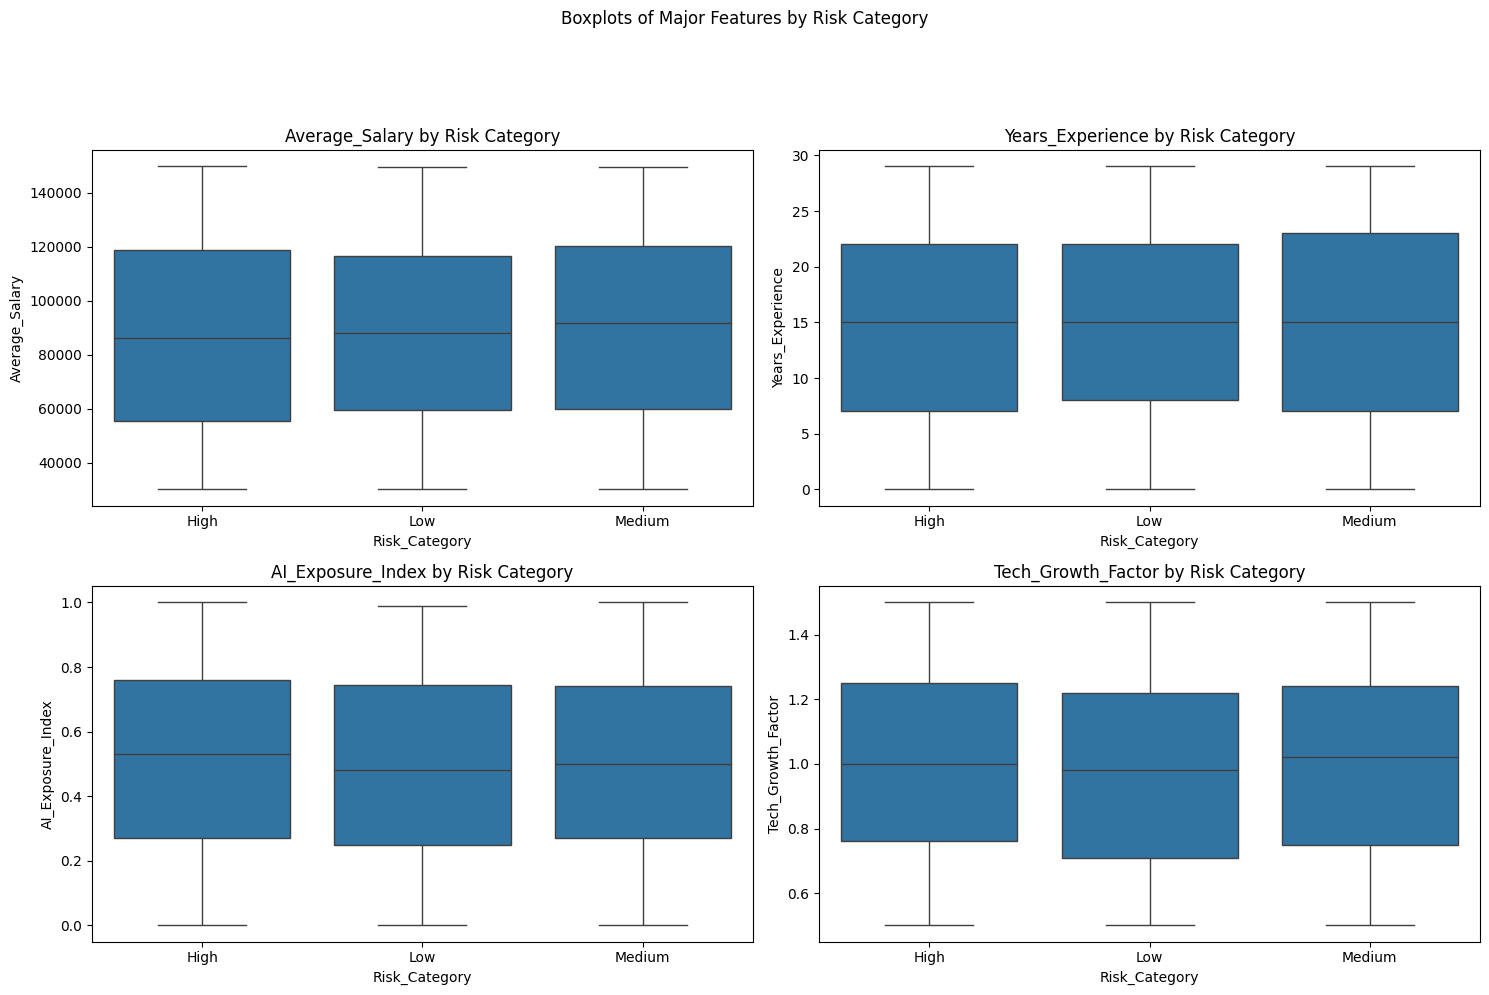

In [ ]:
plt.figure(figsize=(15, 10))

numeric_cols_for_boxplot = ['Average_Salary', 'Years_Experience', 'AI_Exposure_Index', 'Tech_Growth_Factor']

for i, col in enumerate(numeric_cols_for_boxplot):
    plt.subplot(2, 2, i + 1) # Create a 2x2 grid for 4 plots
    sns.boxplot(data=df, x="Risk_Category", y=col)
    plt.title(f'{col} by Risk Category')

plt.suptitle("Boxplots of Major Features by Risk Category", y=1.02) # Adjust suptitle position
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

In [ ]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,Average_Salary,Years_Experience,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,...,Job_Title_Security Guard,Job_Title_Software Engineer,Job_Title_Teacher,Job_Title_Truck Driver,Job_Title_UX Researcher,Education_Level_High School,Education_Level_Master's,Education_Level_PhD,Risk_Category_Low,Risk_Category_Medium
0,45795,28,0.18,1.28,0.85,0.45,0.10,0.46,0.33,0.14,...,True,False,False,False,False,False,True,False,False,False
1,133355,20,0.62,1.11,0.05,0.02,0.52,0.40,0.05,0.97,...,False,False,False,False,False,False,False,True,True,False
2,146216,2,0.86,1.18,0.81,0.01,0.94,0.56,0.39,0.02,...,False,False,False,False,False,True,False,False,False,False
3,136530,13,0.39,0.68,0.60,0.43,0.21,0.57,0.03,0.84,...,False,True,False,False,False,False,False,True,False,True
4,70397,22,0.52,1.46,0.64,0.75,0.54,0.59,0.97,0.61,...,False,False,False,False,False,True,False,False,False,True


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df["Risk_Category_Encoded"] = label_encoder.fit_transform(df["Risk_Category"])
df["Risk_Category_Encoded"].head()


,Risk_Category_Encoded
0,0
1,1
2,0
3,2
4,2


In [ ]:
y = df["Risk_Category_Encoded"]

X = df.drop(columns=["Risk_Category", "Risk_Category_Encoded"])
X = pd.get_dummies(X, drop_first=True)   # encode remaining categorical features

X.head()


,Average_Salary,Years_Experience,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,...,Job_Title_Research Scientist,Job_Title_Retail Worker,Job_Title_Security Guard,Job_Title_Software Engineer,Job_Title_Teacher,Job_Title_Truck Driver,Job_Title_UX Researcher,Education_Level_High School,Education_Level_Master's,Education_Level_PhD
0,45795,28,0.18,1.28,0.85,0.45,0.10,0.46,0.33,0.14,...,False,False,True,False,False,False,False,False,True,False
1,133355,20,0.62,1.11,0.05,0.02,0.52,0.40,0.05,0.97,...,True,False,False,False,False,False,False,False,False,True
2,146216,2,0.86,1.18,0.81,0.01,0.94,0.56,0.39,0.02,...,False,False,False,False,False,False,False,True,False,False
3,136530,13,0.39,0.68,0.60,0.43,0.21,0.57,0.03,0.84,...,False,False,False,True,False,False,False,False,False,True
4,70397,22,0.52,1.46,0.64,0.75,0.54,0.59,0.97,0.61,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y)


In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
log_model = LogisticRegression(max_iter=1000, multi_class="auto")
log_model.fit(X_train_scaled, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='auto')

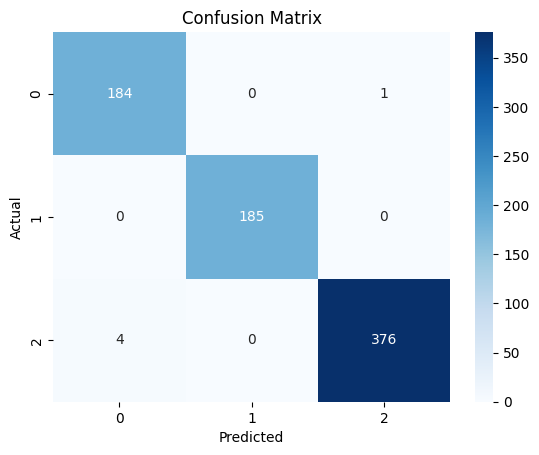

In [ ]:
y_pred = log_model.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       185
           1       1.00      1.00      1.00       185
           2       1.00      0.99      0.99       380

    accuracy                           0.99       750
   macro avg       0.99      0.99      0.99       750
weighted avg       0.99      0.99      0.99       750



In [ ]:
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": log_model.coef_[0]
})

coeff_df.sort_values(by="Coefficient", ascending=False).head(10)


,Feature,Coefficient
4,Automation_Probability_2030,2.715531
17,Job_Title_Customer Support,0.887087
28,Job_Title_Retail Worker,0.796569
16,Job_Title_Construction Worker,0.762979
32,Job_Title_Truck Driver,0.744657
29,Job_Title_Security Guard,0.700681
12,Skill_8,0.559876
3,Tech_Growth_Factor,0.314284
0,Average_Salary,0.159221
2,AI_Exposure_Index,0.146969
